In [1]:
# A new attempt at the Titanic Kaggle comptetition,
# focused on learning and understanding code and ML concepts

In [2]:
# Loading required libraries
library(tidyverse)
library(scales)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘scales’




The following object is masked from ‘package:purrr’:

    discard




The following object is masked from ‘package:readr’:

    col_factor




In [3]:
# Reading the data
train <- read.csv("/kaggle/input/titanic/train.csv", stringsAsFactors = FALSE)

In [4]:
# Basic structure of the data
str(train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [5]:
summary(train)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [6]:
# Visualizing gender vs. survival rate
# Calculate counts first
gender_counts <- table(train$Sex)

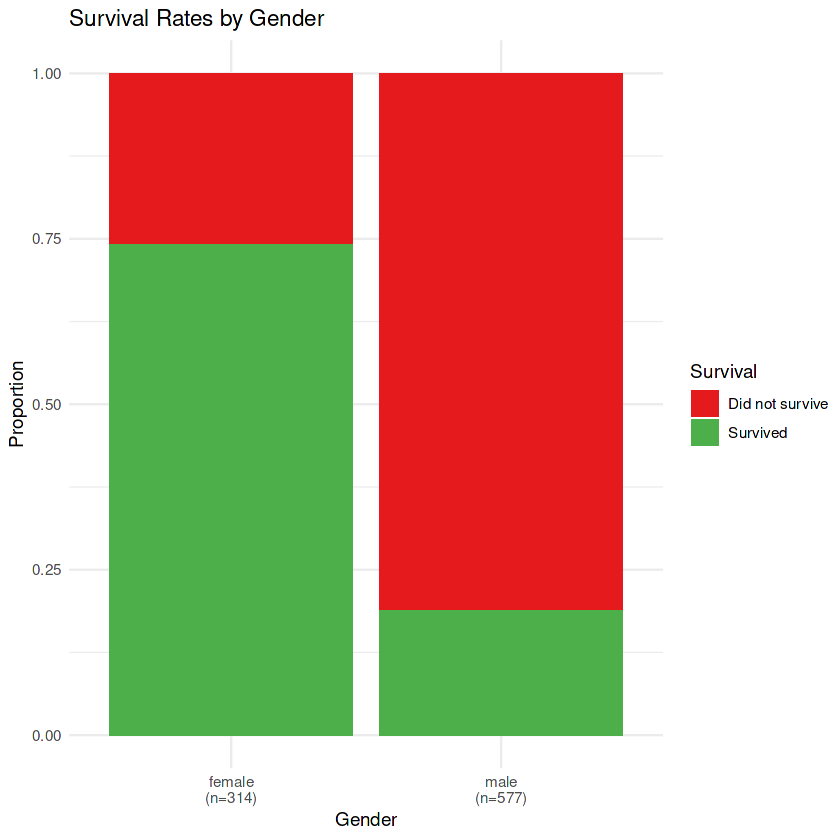

In [7]:
# Creating a plot of gender vs. survival rate

ggplot(train, aes(x = Sex, fill = factor(Survived))) +
    geom_bar(position = "fill") +
    scale_fill_manual(
        values = c("#E41A1C", "#4DAF4A"),
        labels = c("Did not survive", "Survived"),
        name = "Survival") +
    scale_x_discrete(labels = function(x) paste0(x, "\n(n=", gender_counts[x], ")")) +
    labs(
        title = "Survival Rates by Gender",
        x = "Gender",
        y = "Proportion"
    ) +
    theme_minimal()

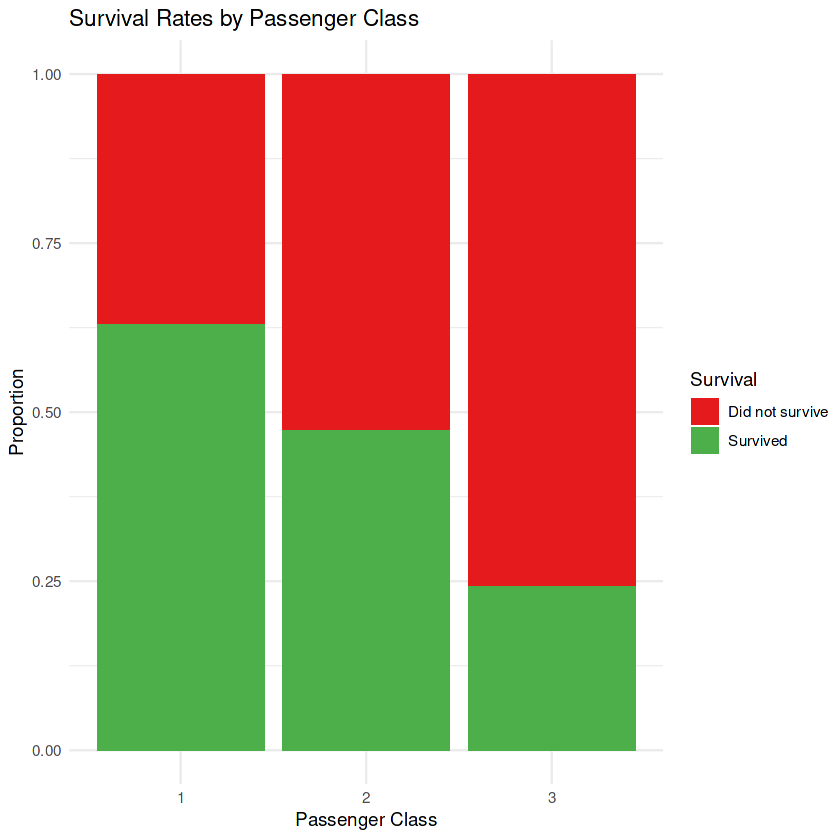

In [8]:
# Now, let's look at survival rate by passenger class
ggplot(train, aes(x = factor(Pclass), fill = factor(Survived))) +
    geom_bar(position = "fill") +
    scale_fill_manual(
        values = c("#E41A1C", "#4DAF4A"),
        labels = c("Did not survive", "Survived"),
        name = "Survival") +
    labs(
        title = "Survival Rates by Passenger Class",
        x = "Passenger Class",
        y = "Proportion"
    ) +
    theme_minimal()


In [9]:
# You can clearly see that lower passenger class 
# led to lower survival rate

In [10]:
# Break age down into age groups to visualize survival rates by age group
# Add AgeGroup column
train$AgeGroup <- cut(train$Age,
                     breaks = c(0, 12, 19, 30, 50, Inf),
                     labels = c("Child \n(0 - 12)", "Teen \n(13 - 19)", "Young Adult \n(20 - 30)", "Adult \n(31 - 50)", "Senior \n(51 - inf)"),
                     include_lowest = TRUE)
train$AgeGroup <- factor(train$AgeGroup, levels = c(levels(train$AgeGroup), "Unknown"))
train$AgeGroup[is.na(train$AgeGroup)] <- "Unknown"

In [11]:
# Calculate counts first
age_counts <- table(train$AgeGroup)

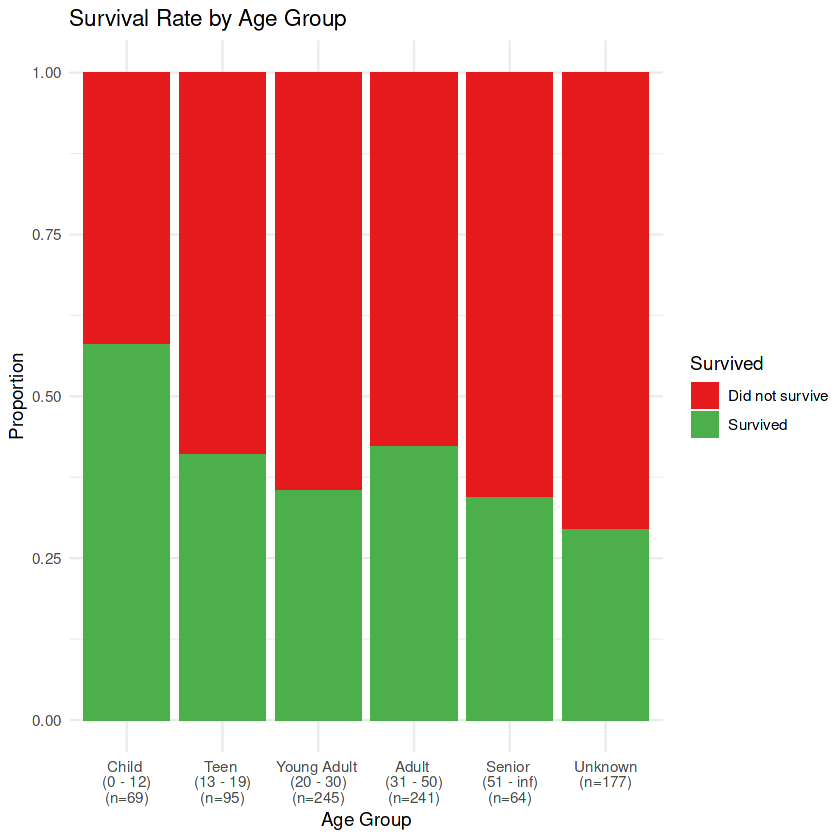

In [12]:
# Visualize  survival rates by age group
ggplot(train, aes(x = AgeGroup, fill = factor(Survived))) +
    geom_bar(position = "fill") +
    scale_fill_manual(
        values = c("#E41A1C", "#4DAF4A"),
        labels = c("Did not survive", "Survived"),
        name = "Survived"
    ) +
    scale_x_discrete(labels = function(x) paste0(x, "\n(n=", age_counts[x], ")")) +
    labs(
        title = "Survival Rate by Age Group",
        x = "Age Group",
        y = "Proportion"
    ) +
    theme_minimal()

In [13]:
# Calculate counts for understanding before plotting
class_gender_counts <- table(train$Pclass, train$Sex)

print(class_gender_counts)

   
    female male
  1     94  122
  2     76  108
  3    144  347


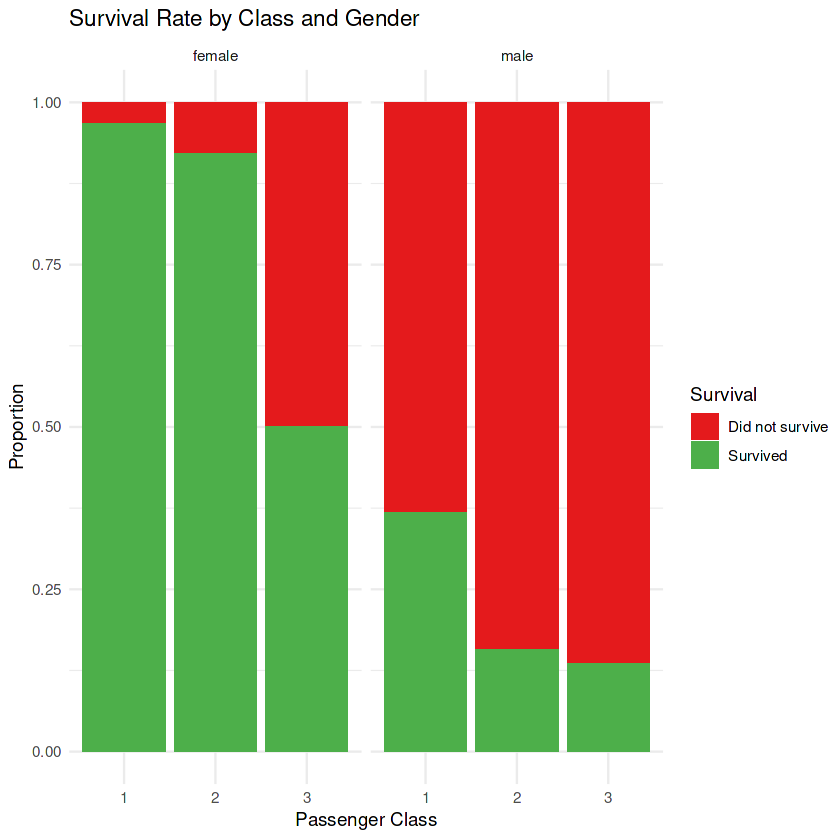

In [14]:
# Visualize interaction between Sex and Pclass
# Plot with separate labels for each facet
ggplot(train, aes(x = factor(Pclass), fill = factor(Survived))) +
    geom_bar(position = "fill") +
    facet_wrap(~Sex) + 
    scale_fill_manual(
        values = c("#E41A1C", "#4DAF4A"),
        labels = c("Did not survive", "Survived"),
        name = "Survival"
    ) +
    labs(
        title = "Survival Rate by Class and Gender",
        x = "Passenger Class",
        y = "Proportion"
    ) +
    theme_minimal()

In [15]:
# Modelling

In [16]:
# Prepare data for modeling, which uses Sex, Pclass and AgeGroup
model_data <- train %>%
    select(Survived, Sex, Pclass, AgeGroup) %>%
    # Convert variables to factors
    mutate(
        Survived = factor(Survived),
        Sex = factor(Sex),
        Pclass = factor(Pclass),
        AgeGroup = factor(AgeGroup)
    ) 

head(model_data)

,Survived,Sex,Pclass,AgeGroup
,<fct>,<fct>,<fct>,<fct>
1,0,male,3,Young Adult (20 - 30)
2,1,female,1,Adult (31 - 50)
3,1,female,3,Young Adult (20 - 30)
4,1,female,1,Adult (31 - 50)
5,0,male,3,Adult (31 - 50)
6,0,male,3,Unknown


In [17]:
# Let's do cross-validation on the training data

In [18]:
library(caret)

Loading required package: lattice




Attaching package: ‘caret’




The following object is masked from ‘package:purrr’:

    lift




The following object is masked from ‘package:httr’:

    progress




In [19]:
# Set up of cross-validation control
# We'll use 5-fold cross-validation, which means:
# - Split data into 5 parts
# - Use 4 parts for training, 1 for testing
# - Repeat 5 times, each time using a different part for testing
ctrl <- trainControl(method = "cv", number = 5)

In [20]:
# Setting up 4 different models and trying them out:
# - Logistic Regression
# - Random Forest
# - Decision Tree
# - XGBoost

In [21]:
# Logistic regression model:
log_reg_model <- train(
    Survived ~ Sex + Pclass + AgeGroup,
    data = model_data,
    method = "glm",
    family = "binomial",
    trControl = ctrl
)

In [22]:
# Random Forest model:
rf_model <- train(
    Survived ~ Sex + Pclass + AgeGroup,
    data = model_data,
    method = "rf",
    family = "binomial",
    trControl = ctrl
)

In [23]:
# Load rpart library
library(tree)

In [24]:
# Decision tree model
tree_model <- train(
    Survived ~ Sex + Pclass + AgeGroup,
    data = model_data,
    trControl = ctrl
)

In [25]:
# XGBoost model
# Not even sink removes the warning outputs...
# Will therefore not use it here, even though it 
# performed slightly better than RF

In [26]:
results <- resamples(list(
    Logistic = log_reg_model,
    RandomForest = rf_model,
    DecisionTree = tree_model
))
summary(results)


Call:
summary.resamples(object = results)

Models: Logistic, RandomForest, DecisionTree 
Number of resamples: 5 

Accuracy 
                  Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Logistic     0.7486034 0.7528090 0.8146067 0.7912914 0.8192090 0.8212291    0
RandomForest 0.7528090 0.8033708 0.8033708 0.8035717 0.8212291 0.8370787    0
DecisionTree 0.7865169 0.7966102 0.8033708 0.8035565 0.8044693 0.8268156    0

Kappa 
                  Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Logistic     0.4582180 0.4591419 0.6017627 0.5518919 0.6136426 0.6266945    0
RandomForest 0.4374371 0.5652477 0.5823837 0.5660927 0.6056183 0.6397767    0
DecisionTree 0.5368513 0.5401142 0.5599494 0.5650846 0.5652477 0.6232602    0


In [27]:
# Load test data
test <- read.csv("/kaggle/input/titanic/test.csv", stringsAsFactors = FALSE)

In [28]:
# Prepare test data the same way as training data
# Break age down into age groups to visualize survival rates by age group
# Add AgeGroup column
test$AgeGroup <- cut(test$Age,
                     breaks = c(0, 12, 19, 30, 50, Inf),
                     labels = c("Child \n(0 - 12)", "Teen \n(13 - 19)", "Young Adult \n(20 - 30)", "Adult \n(31 - 50)", "Senior \n(51 - inf)"),
                     include_lowest = TRUE)
test$AgeGroup <- factor(test$AgeGroup, levels = c(levels(test$AgeGroup), "Unknown"))
test$AgeGroup[is.na(test$AgeGroup)] <- "Unknown"

In [29]:
# Use Sex, Pclass and AgeGroup as predictors
# Convert to factors just like with training data
test_data <- test %>%
    select(Sex, Pclass, AgeGroup) %>%
    mutate(
        Sex = factor(Sex),
        Pclass = factor(Pclass),
        AgeGroup = factor(AgeGroup)
    )

head(test_data)

,Sex,Pclass,AgeGroup
,<fct>,<fct>,<fct>
1,male,3,Adult (31 - 50)
2,female,3,Adult (31 - 50)
3,male,2,Senior (51 - inf)
4,male,3,Young Adult (20 - 30)
5,female,3,Young Adult (20 - 30)
6,male,3,Teen (13 - 19)


In [30]:
# Make predictions using XGBoost since that's the model
# that performed the best in cross-validation
predictions <- predict(rf_model, newdata = test_data)

In [31]:
# Create submission dataframe
submission <- data.frame(
    PassengerId = test$PassengerId,
    Survived = predictions
)

In [32]:
# Write to CSV file
write.csv(submission, "submission.csv", row.names = FALSE)